## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

# Linear Regression

🎯 In this exercise, you will model the performance of an NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [3]:
df = pd.read_csv('NBA.csv')
df.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define Feature Set and Target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` is the target.

In [8]:
X = df[['mp', 'poss', 'do_ratio', 'pacing']]
y = df['win_rating']

👇 In a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), visualize the relationship between the rating and the minutes played.

Text(0.5, 1.0, 'Scatter Plot of Win Rating vs. Minutes Played')

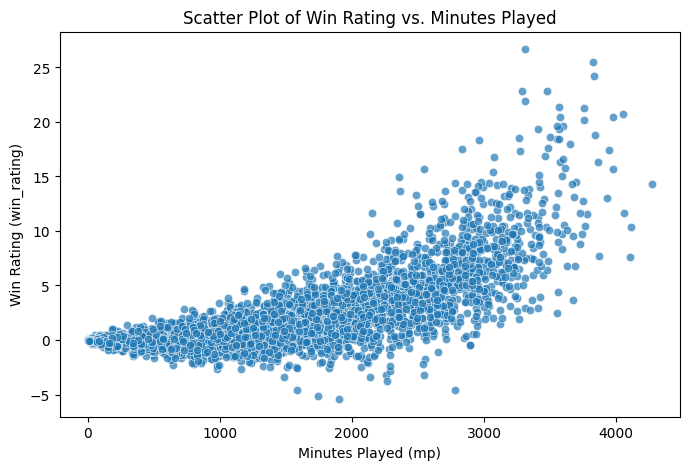

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['mp'], y=df['win_rating'], alpha=0.7)

# Labels and title
plt.xlabel("Minutes Played (mp)")
plt.ylabel("Win Rating (win_rating)")
plt.title("Scatter Plot of Win Rating vs. Minutes Played")

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-Validation

👇 Using Sklearn's [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), run a 5-fold cross-validation on a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model predicting the player performance rating from minutes played. Save the raw output of the cross-validation under a new variable called `cv_results`.

In [32]:
X = df[['mp']]
y = df['win_rating']  
model = LinearRegression()

# Perform 5-fold cross-validation
cv_results = cross_validate(model, X, y, cv=5)
cv_results


{'fit_time': array([0.00565624, 0.00176597, 0.00167346, 0.00105429, 0.00123572]),
 'score_time': array([0.0032022 , 0.00140619, 0.00076032, 0.0007    , 0.00082111]),
 'test_score': array([0.5555057 , 0.53447908, 0.53790391, 0.57658459, 0.57917762])}

❓ What is the lowest score of the cross-validation? Compute your answer and save the value under a new variable called `min_score`.

In [26]:
min_score = min(cv_results['test_score'])
min_score

0.5344790822272503

❓ What is the highest score of the cross-validation?  Compute your answer and save the value under a new variable called `max_score`.

In [27]:
max_score = max(cv_results['test_score'])
max_score

0.5791776193355005

❓ What is the mean score of the cross-validation? Compute your answer and save the value under a new variable called `mean_score`.

In [28]:
import numpy as np
mean_score = np.mean(cv_results['test_score'])
mean_score

0.5567301800068911

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [29]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'cv_results',
    cv_result = cv_results,
    mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/mahshid/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/mahshid/code/mahshid90/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as `K` increases from 2 to 20.

In [33]:
X = df[['mp']]
y = df['win_rating'] 

# Lists to store results
k_values = list(range(2, 21)) 
total_times = []
mean_scores = []

# Loop over different values of K
for k in k_values:
    cv_results = cross_validate(model, X, y, cv=k)
    
    # Compute total computational time (sum of fit_time and score_time)
    total_time = np.sum(cv_results['fit_time']) + np.sum(cv_results['score_time'])
    total_times.append(total_time)
    
    # Compute mean score
    mean_score = np.mean(cv_results['test_score'])
    mean_scores.append(mean_score)
    
    

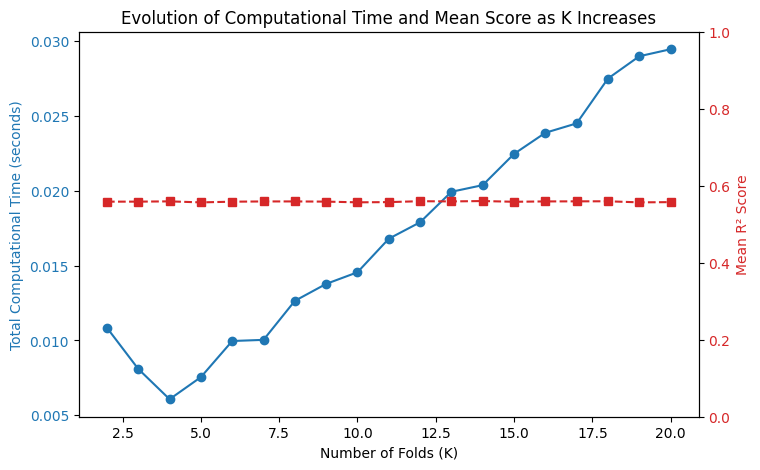

In [34]:
# Plot
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot total computational time
ax1.set_xlabel('Number of Folds (K)')
ax1.set_ylabel('Total Computational Time (seconds)', color='tab:blue')
ax1.plot(k_values, total_times, marker='o', color='tab:blue', label="Total Time")
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for mean score
ax2 = ax1.twinx()
ax2.set_ylim(0, 1) 
ax2.set_ylabel('Mean R² Score', color='tab:red')
ax2.plot(k_values, mean_scores, marker='s', linestyle='--', color='tab:red', label="Mean Score")
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.title('Evolution of Computational Time and Mean Score as K Increases');


ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the Model

Cross-validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross-validation.

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict). Save the trained model under the variable `model`.

In [37]:
model = model.fit(X, y)
model

LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under a variable named `slope`.

In [38]:
slope = model.coef_[0]
slope

0.002602579938640193

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under a variable named `intercept`.

In [39]:
intercept = model.intercept_  
intercept

-1.5463749371639444

🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [40]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'trained_model',
    slope = slope,
    intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/mahshid/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/mahshid/code/mahshid90/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted value in a variable called `prediction`.

In [44]:
mp_input = pd.DataFrame([[1000]], columns=["mp"])
prediction = model.predict(mp_input)[0]

prediction

1.0562050014762487

### ☑️ Test your code

In [46]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'prediction',
    prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/mahshid/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/mahshid/code/mahshid90/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5. Improving the Model with More Features

Your friend who enjoys the NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio, and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

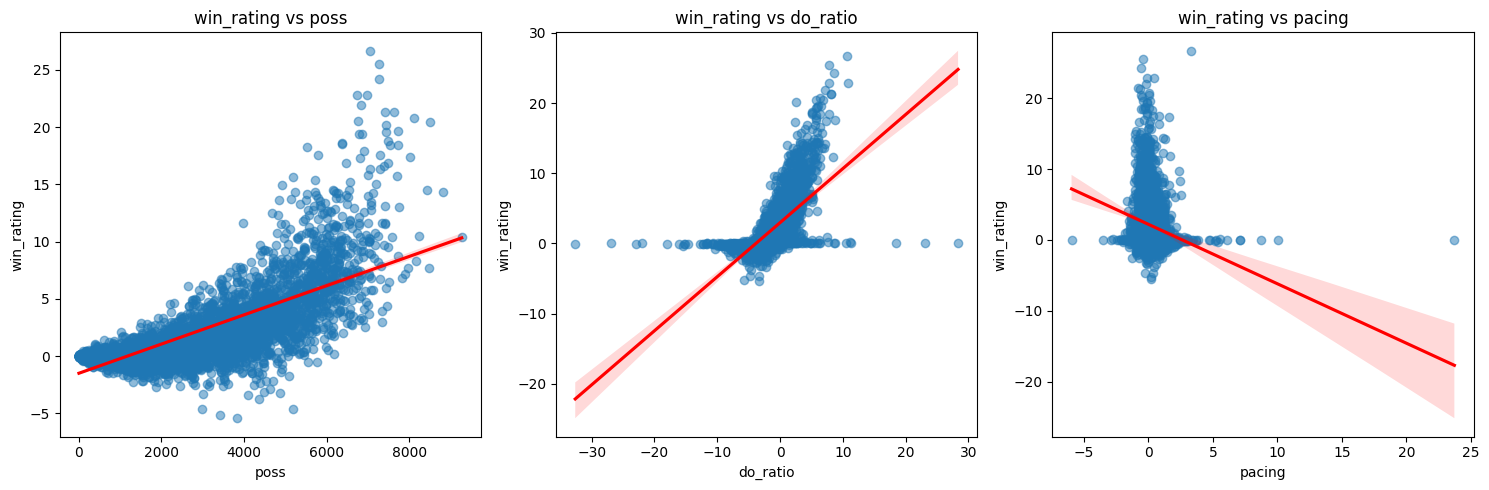

In [62]:
# new features
features = ["poss", "do_ratio", "pacing"]

# Create subplots for each feature
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through features and plot
for i, feature in enumerate(features):
    sns.regplot(x=df[feature], y=df["win_rating"], ax=axes[i], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    axes[i].set_title(f'win_rating vs {feature}')

plt.tight_layout()

<AxesSubplot:>

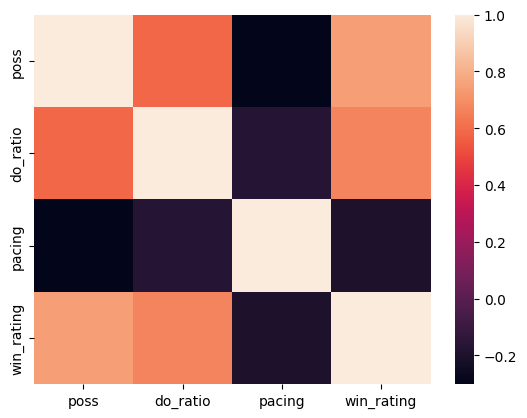

In [69]:
sns.heatmap(df[["poss", "do_ratio", "pacing", "win_rating"]].corr())

<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [80]:
X = df[['mp', 'do_ratio']]
y = df['win_rating']

❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [81]:
model2 = LinearRegression()

# Perform 5-fold cross-validation
results = cross_validate(model2, X, y, cv=10)
results

{'fit_time': array([0.01583767, 0.00812316, 0.00245309, 0.00197411, 0.00718021,
        0.00235844, 0.00140762, 0.00177336, 0.001472  , 0.00102091]),
 'score_time': array([0.00351   , 0.00147963, 0.00230885, 0.00119281, 0.00320458,
        0.0024178 , 0.00091314, 0.00204444, 0.00075841, 0.00069714]),
 'test_score': array([0.62433938, 0.66610229, 0.61564229, 0.63993488, 0.60263774,
        0.56612144, 0.63722207, 0.68139751, 0.65206894, 0.64677408])}

In [82]:
mean_2_feat_score = np.mean(results['test_score'])
mean_2_feat_score

0.6332240613774849

### ☑️ Test your code

In [83]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'improved_score',
    improved_score = mean_2_feat_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/mahshid/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/mahshid/code/mahshid90/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score PASSED    [100%]

============================== 1 passed in 0.19s ===============================


💯 You can commit your code:

git add tests/improved_score.pickle

git commit -m 'Completed improved_score step'

git push origin master



You should see an **increase of around 8%** in your $R^2$ 👏

Congrats, you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁